<a href="https://colab.research.google.com/github/rajpurohit-shubham/intern-/blob/main/task_4_(_terrorism).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SHUBHAM RAJPUROHIT** 

:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?



**DATA PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!py -m pip install folium


In [2]:
import folium
from folium.plugins import MarkerCluster

In [6]:
df = pd.read_csv("/content/globalterrorism.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,31,33,60,62,76,79,94,96,114,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.97e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.97e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.97001e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.97001e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.97001e+11,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21199 entries, 0 to 21198
Columns: 135 entries, eventid to related
dtypes: float64(78), object(57)
memory usage: 21.8+ MB


In [13]:
df.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,20289.000000,2.028900e+04,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,3481.000000,21198.000000,21198.000000,21198.000000,21198.000000,31.000000,2.000000,21198.000000,20056.000000,21133.000000,263.000000,194.000000,235.000000,36.000000,24.000000,36.000000,0.0,0.0,21198.000000,38.000000,2.000000,21198.000000,4079.000000,977.000000,981.000000,255.000000,11.000000,10.000000,1.0,1.0,20.000000,21198.000000,17253.000000,1412.000000,1200.000000,210.000000,179.000000,40.000000,38.000000,17072.000000,1542.000000,1623.000000,15451.000000,1504.000000,1445.000000,21198.000000,9944.000000,4.663000e+03,21030.000000,1766.000000,1766.000000,499.000000,341.000000,20909.000000,4.480000e+02,1.0,9.300000e+01,1.0,714.000000,545.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,1979.038636,6.273658,15.151382,0.018445,173.672233,5.338617,24.812992,-4.279889e+03,1.312577,0.019860,0.990282,0.991414,0.860553,-1.403906,1.195346,0.037739,0.912350,0.000330,3.142278,4.903226,3.000000,7.090810,41.864579,136.053566,9.490494,50.974227,171.910638,8.888889,56.666667,129.305556,NaN,NaN,0.044816,0.342105,0.500000,0.002076,-3.094631,-79.139202,-0.091743,4.517647,0.909091,3.300000,1.0,1.0,0.450000,6.611709,10.462586,6.395892,9.534167,6.380952,7.446927,6.275000,10.552632,1.932228,0.340467,0.429452,1.476927,0.387633,0.067128,0.654684,3.490949,3.194679e+05,0.083975,2.926387,0.137033,6.174349,23.322581,0.021617,3.727557e+06,20000.0,1.290674e+06,0.0,2.907563,9.144954,-3.481130,-3.437730,0.240777,-2.505284
std,3.546265,3.477785,8.966427,0.134558,162.978536,3.340933,23.246900,6.050701e+05,0.981954,0.139524,0.098102,0.092263,0.346421,3.507853,0.493977,0.190570,0.282792,0.018169,1.974108,2.454314,1.414214,6.344069,31.057571,76.765885,6.744443,28.244204,112.557509,5.936703,24.967225,74.572618,NaN,NaN,0.206904,0.480783,0.707107,0.045513,74.072303,40.195412,1.841069,3.072401,0.301511,3.560587,NaN,NaN,0.510418,2.411729,7.185887,1.935109,6.968211,2.251553,6.866400,1.601081,7.855786,8.936378,6.225185,2.529441,10.287833,2.952159,0.363204,0.771670,0.526974,8.324244e+06,0.277357,499.566704,4.367718,78.246450,62.752186,0.145434,4.764528e+07,NaN,4.727624e+06,NaN,1.312310,33.433911,4.493153,4.541534,0.655037,4.460331
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-51.692214,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,8.000000,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1977.000000,3.000000,7.000000,0.000000,65.000000,2.000000,13.579801,-8.626701e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.5000

In [15]:
df.corr()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
iyear,1.000000,-0.061739,-0.015113,-0.059429,-0.321241,-0.074888,-0.337572,-0.005957,0.142657,0.096275,-0.039738,0.027833,-0.125412,-0.031682,-0.258461,-0.130184,0.050796,0.018106,-0.042680,0.251970,1.0,0.083005,0.087278,-0.337035,-0.027584,-0.015470,-0.251729,0.375181,0.481272,-0.490301,NaN,NaN,0.041812,-0.348154,NaN,-0.013358,0.458639,0.275570,-0.158712,0.038818,0.695666,0.190168,NaN,NaN,0.295286,0.005080,-0.159479,0.001908,-0.076821,0.016436,0.009311,0.092668,0.112017,0.122355,0.049117,0.132641,0.031301,-0.000115,0.184388,0.150824,0.276822,0.019850,0.006463,0.022824,-0.019780,0.072806,-0.158777,-0.057373,0.009027,NaN,-0.137691,NaN,0.078737,0.049118,-0.004109,-0.007562,-0.184125,-0.091326
imonth,-0.061739,1.000000,0.014328,0.015021,0.011757,-0.041822,-0.033409,-0.011551,-0.030547,-0.014312,-0.009904,-0.005322,0.021808,-0.009230,0.032903,-0.007682,0.002660,0.019474,-0.022252,-0.046816,NaN,-0.007674,-0.003557,-0.008540,-0.006583,0.045597,0.048945,0.177679,0.301713,0.180877,NaN,NaN,0.003280,0.251114,1.0,0.005353,0.036754,0.013921,-0.116244,0.070180,0.585672,-0.058608,NaN,NaN,0.283209,-0.022451,-0.008040,-0.019876,0.025313,0.047764,-0.024154,-0.117381,-0.068771,-0.002052,0.039932,0.031596,0.023075,0.053045,0.023129,-0.003882,-0.019178,0.008520,0.013226,0.026628,0.004461,-0.062886,0.079197,-0.007876,-0.036010,NaN,0.193664,NaN,0.012447,-0.029035,-0.002234,-0.001427,0.024442,0.003820
iday,-0.015113,0.014328,1.000000,-0.005990,0.020194,0.003295,0.009620,-0.006920,-0.012437,-0.002931,0.011273,-0.002022,0.006538,0.002322,-0.017893,-0.001135,-0.003121,-0.000017,-0.046430,-0.157387,-1.0,0.007912,0.003756,0.009108,-0.158663,-0.139075,-0.095190,0.285598,0.293288,-0.330891,NaN,NaN,-0.006759,-0.474009,-1.0,-0.002504,-0.023203,-0.022397,-0.009493,0.057778,0.126773,0.080236,NaN,NaN,-0.291493,-0.037535,0.013144,0.020424,0.002552,0.051025,-0.011984,-0.129187,-0.036351,-0.003575,0.020098,0.025221,-0.005407,0.001924,0.022973,0.005149,0.010969,0.018455,-0.014163,-0.038939,-0.012124,-0.014636,0.051358,-0.004459,0.001961,NaN,0.017223,NaN,0.056546,-0.021091,0.001205,-0.000421,0.013071,0.006828
extended,-0.059429,0.015021,-0.005990,1.000000,-0.057795,-0.014944,-0.056334,0.000940,0.022416,-0.009462,-0.007864,0.012757,0.041013,-0.048382,0.016107,-0.008750,0.041249,-0.002491,0.164702,0.173680,NaN,-0.029705,-0.021271,-0.007415,-0.010135,0.034775,-0.115000,0.172807,-0.046392,-0.330839,NaN,NaN,-0.012748,NaN,NaN,0.009155,0.047993,0.098415,0.041478,0.184726,NaN,NaN,NaN,NaN,-0.452267,0.260340,-0.060536,-0.029368,-0.014056,-0.008378,0.002078,0.310694,0.356811,-0.011574,0.020210,0.013240,-0.016495,0.075565,0.027907,-0.094950,-0.017773,0.000708,0.439361,0.006039,0.006654,-0.062546,0.246563,0.465012,-0.031517,NaN,-0.132811,NaN,-0.086035,-0.003764,0.020766,0.028267,0.029361,0.028971
country,-0.321241,0.011757,0.020194,-0.057795,1.000000,0.334913,0.530418,0.001326,-0.084610,-0.019240,0.046852,-0.080062,-0.049613,0.139229,0.084048,0.015542,-0.024714,-0.007164,-0.117461,-0.408500,-1.0,0.007746,-0.003433,0.601134,0.079629,0.137459,0.335592,-0.344675,-0.382779,0.492326,NaN,NaN,-0.025424,0.730195,-1.0,0.006204,-0.235577,0.010402,-0.023470,-0.029259,-0.100000,0.226968,NaN,NaN,0.231050,-0.112821,0.001577,-0.044714,0.061234,0.033036,0.0517

In [16]:
df.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**US Terror Attacks and Death Injuries**

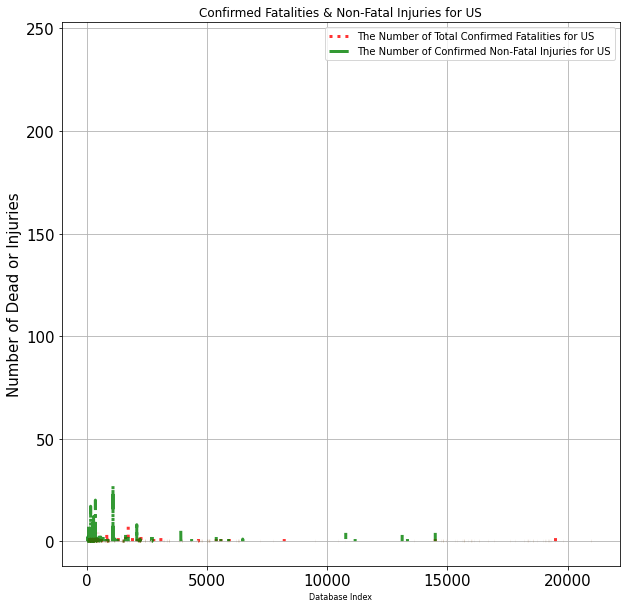

In [21]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 3, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (10,10), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 3, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (10,10), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=8)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

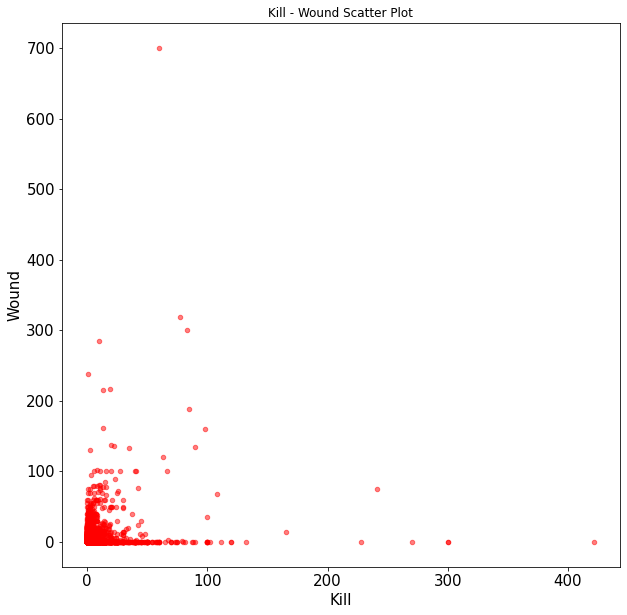

In [23]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

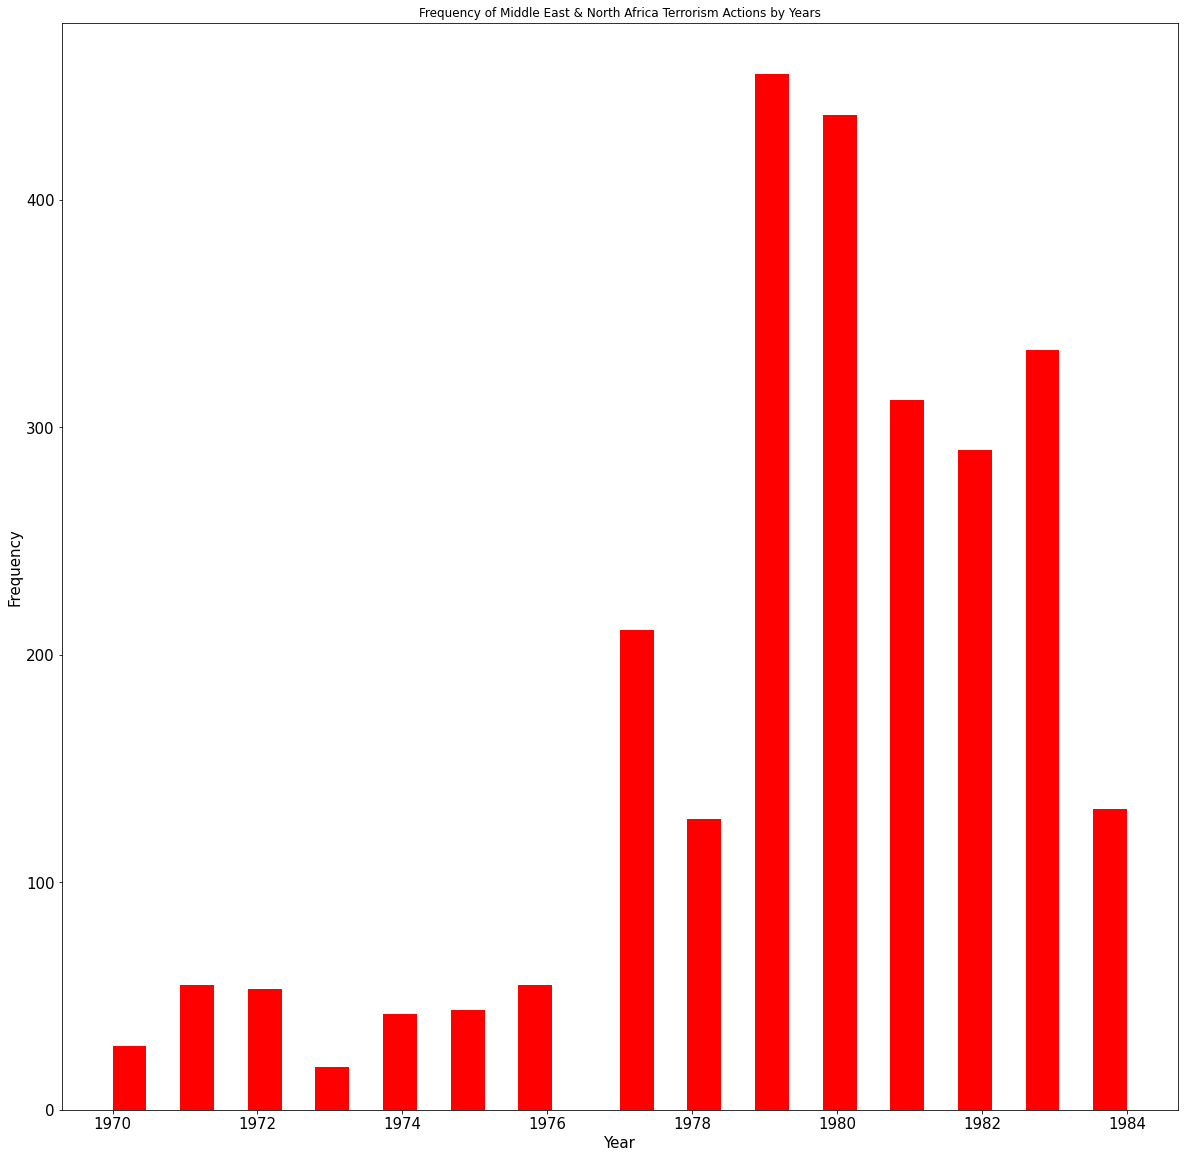

In [25]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

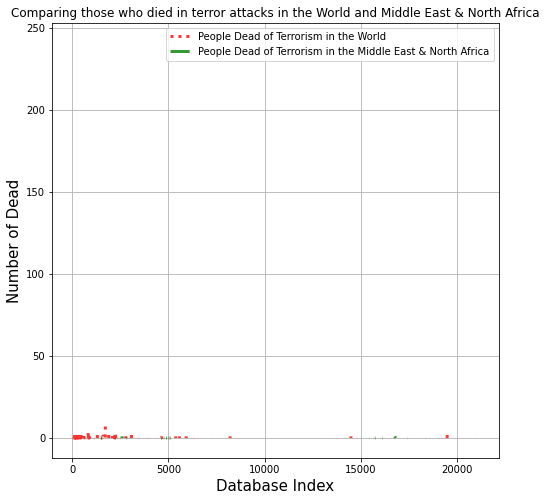

In [27]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 3, alpha = 1.8, grid = True, 
                 linestyle = ':', figsize = (8,8), fontsize=10)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 3, alpha = 1.8, 
                            grid = True, linestyle = '-.', figsize = (8,8), fontsize=10)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

**Terrorist Attacks of a Particular year and their Locations.**

Let's look at the terrorist acts in the world over a certain year.

In [28]:
filterYear = df['iyear'] == 1970

In [29]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [30]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

**Total Number of people killed in terror attack**

In [31]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 32987


Number of people killed by terror attack: 32987

**Let's look at what types of attacks these deaths were made of**

In [32]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [33]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,18486.0,4344.0,6997.0,610.0,186.0,241.0,424.0,19.0,1680.0


In [34]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


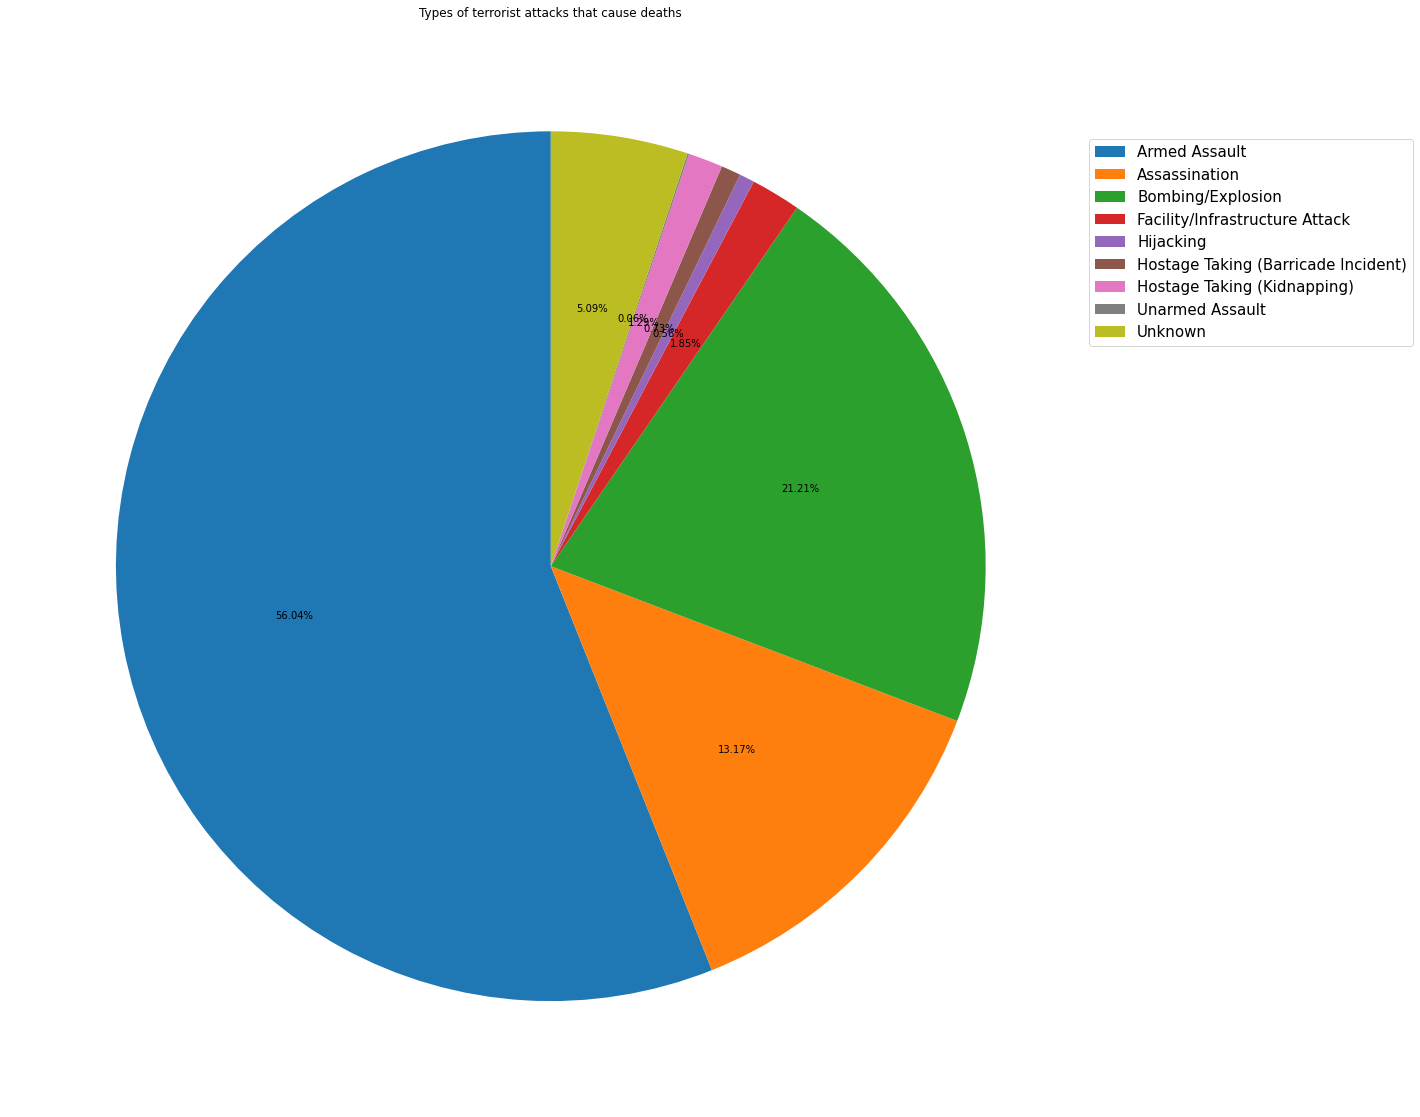

In [35]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

**Number of people  Killed in Terrorist Attacks by Countries.**

In [36]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [37]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,Falkland Islands,France,French Guiana,...,Qatar,Rhodesia,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,0.0,309.0,331.0,6.0,12.0,0.0,0.0,12.0,73.0,12.0,0.0,12.0,1.0,55.0,0.0,2.0,4.0,3.0,3.0,0.0,48.0,1723.0,11.0,22.0,26.0,0.0,5.0,3.0,11.0,1.0,9.0,73.0,7728.0,135.0,0.0,127.0,1.0,...,1.0,217.0,5.0,0.0,0.0,0.0,1.0,93.0,3.0,81.0,0.0,4.0,564.0,20.0,308.0,0.0,0.0,7.0,50.0,467.0,25.0,1.0,191.0,0.0,41.0,336.0,426.0,121.0,2119.0,225.0,4.0,0.0,44.0,65.0,70.0,0.0,4.0,1.0,5.0,59.0


In [38]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 131 entries, Afghanistan to Zimbabwe
dtypes: float64(131)
memory usage: 1.0+ KB


In [39]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

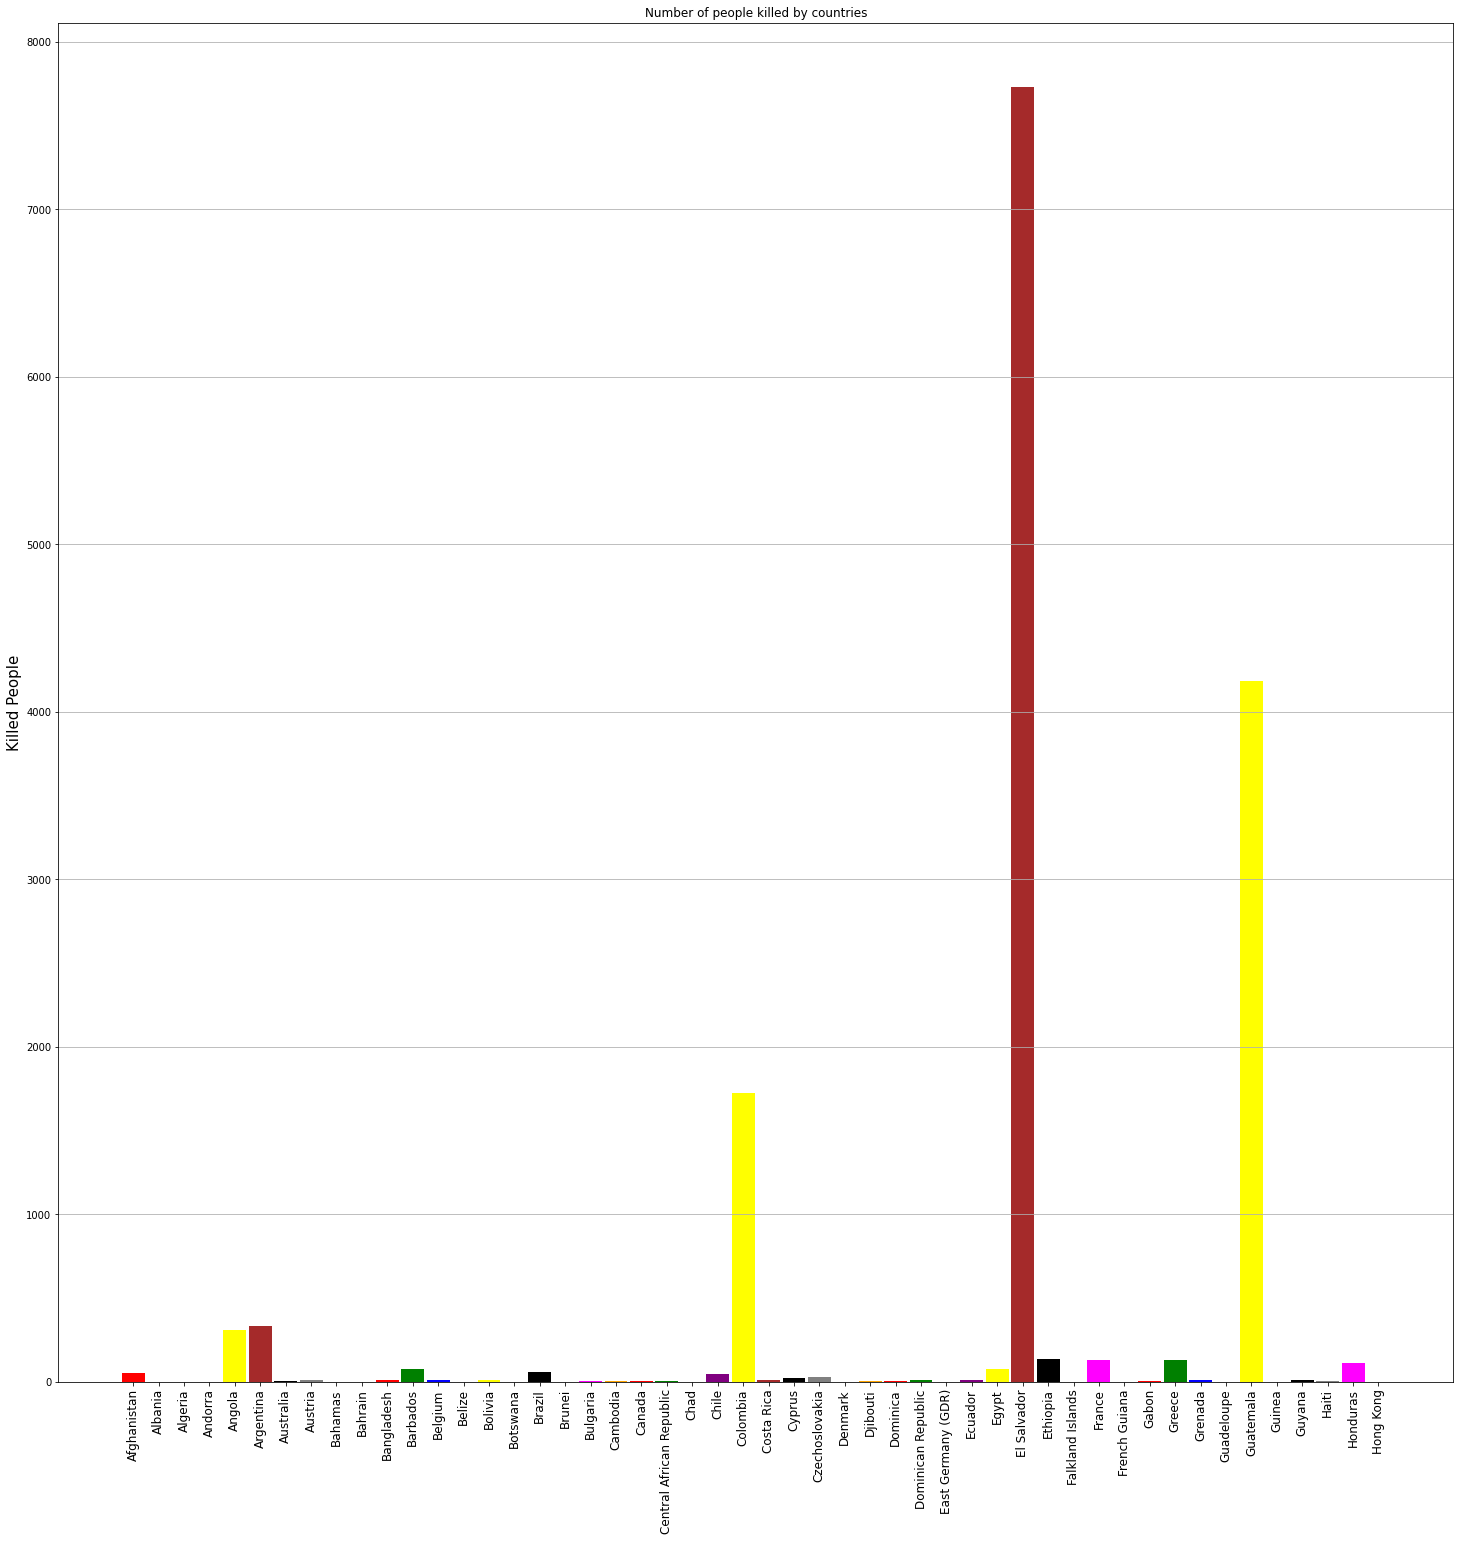

In [40]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

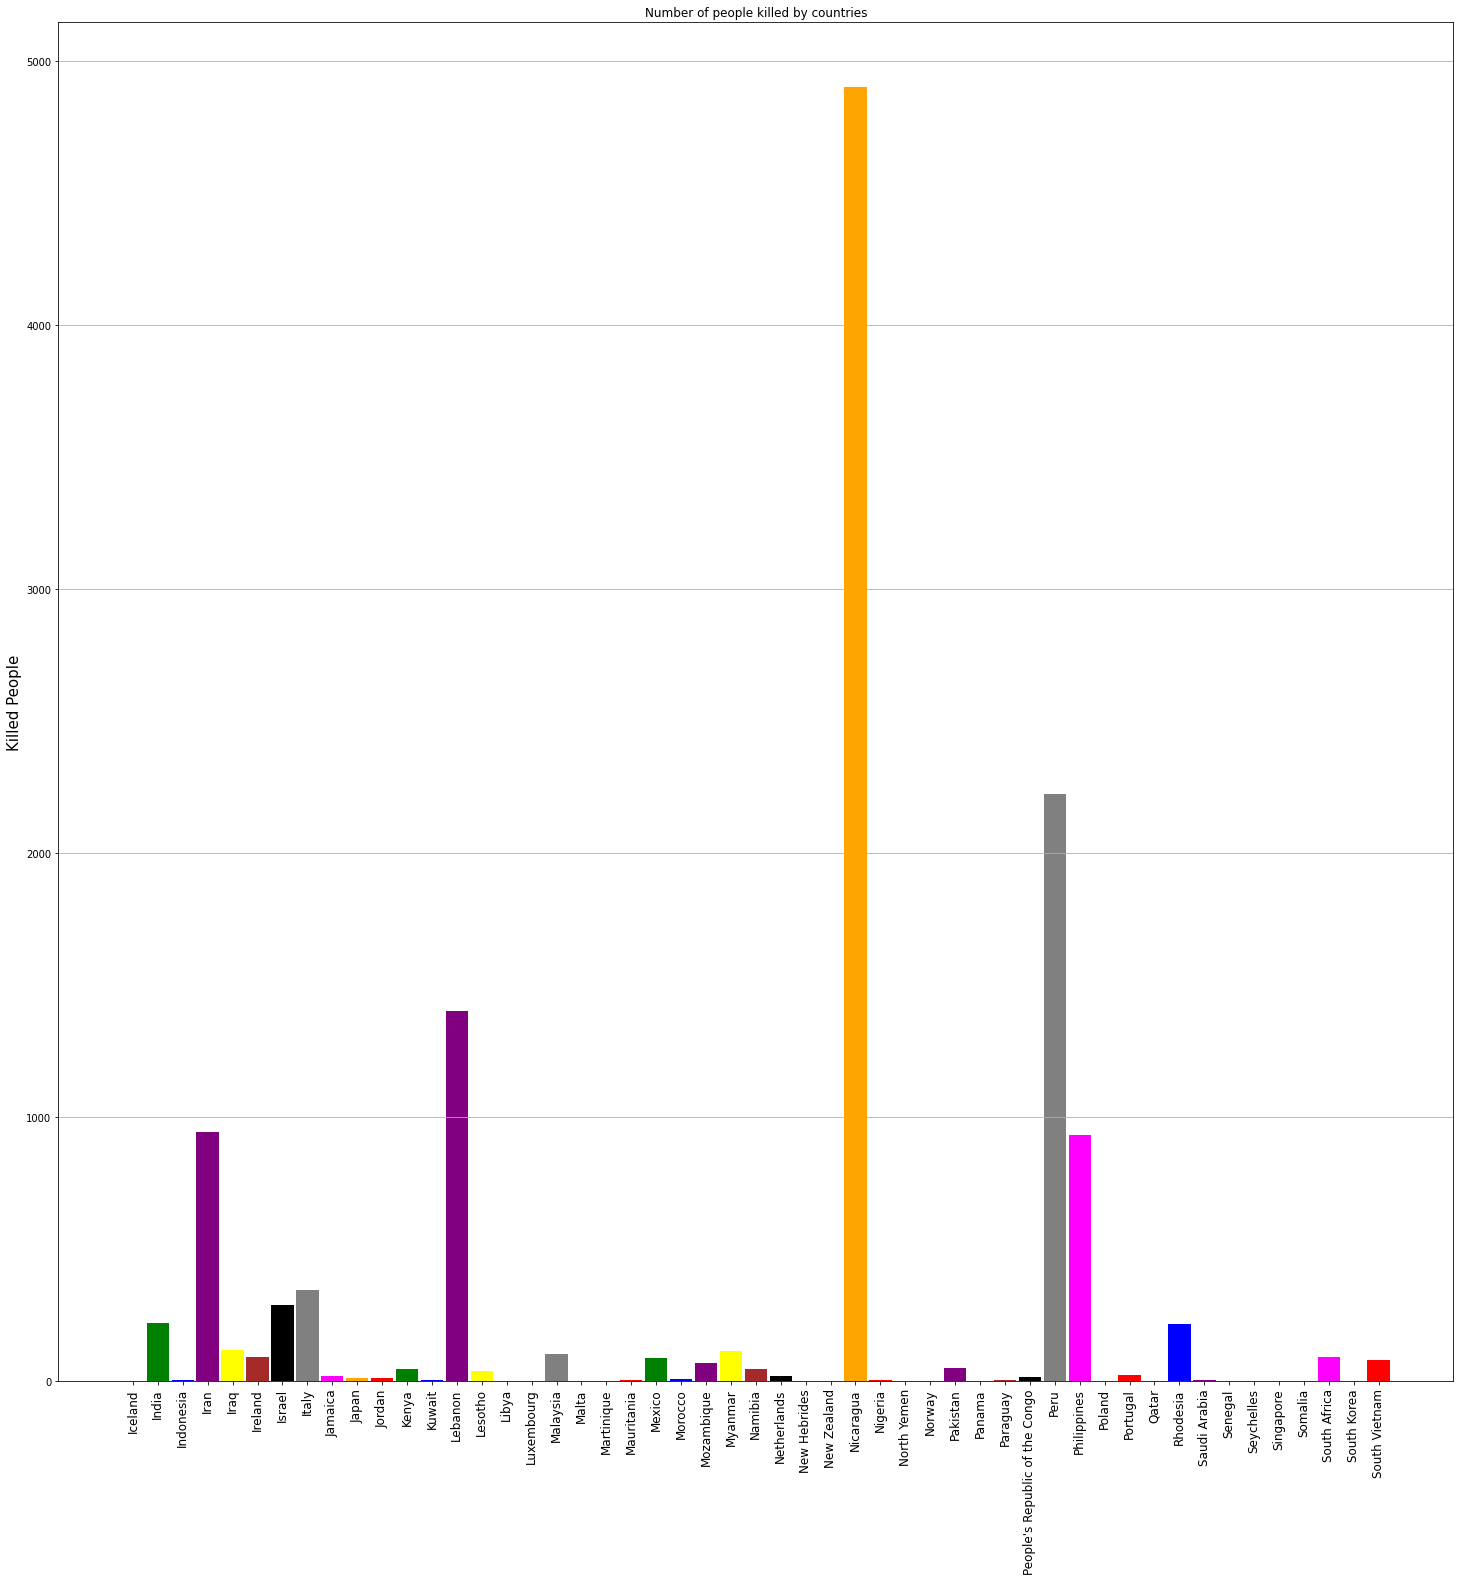

In [41]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

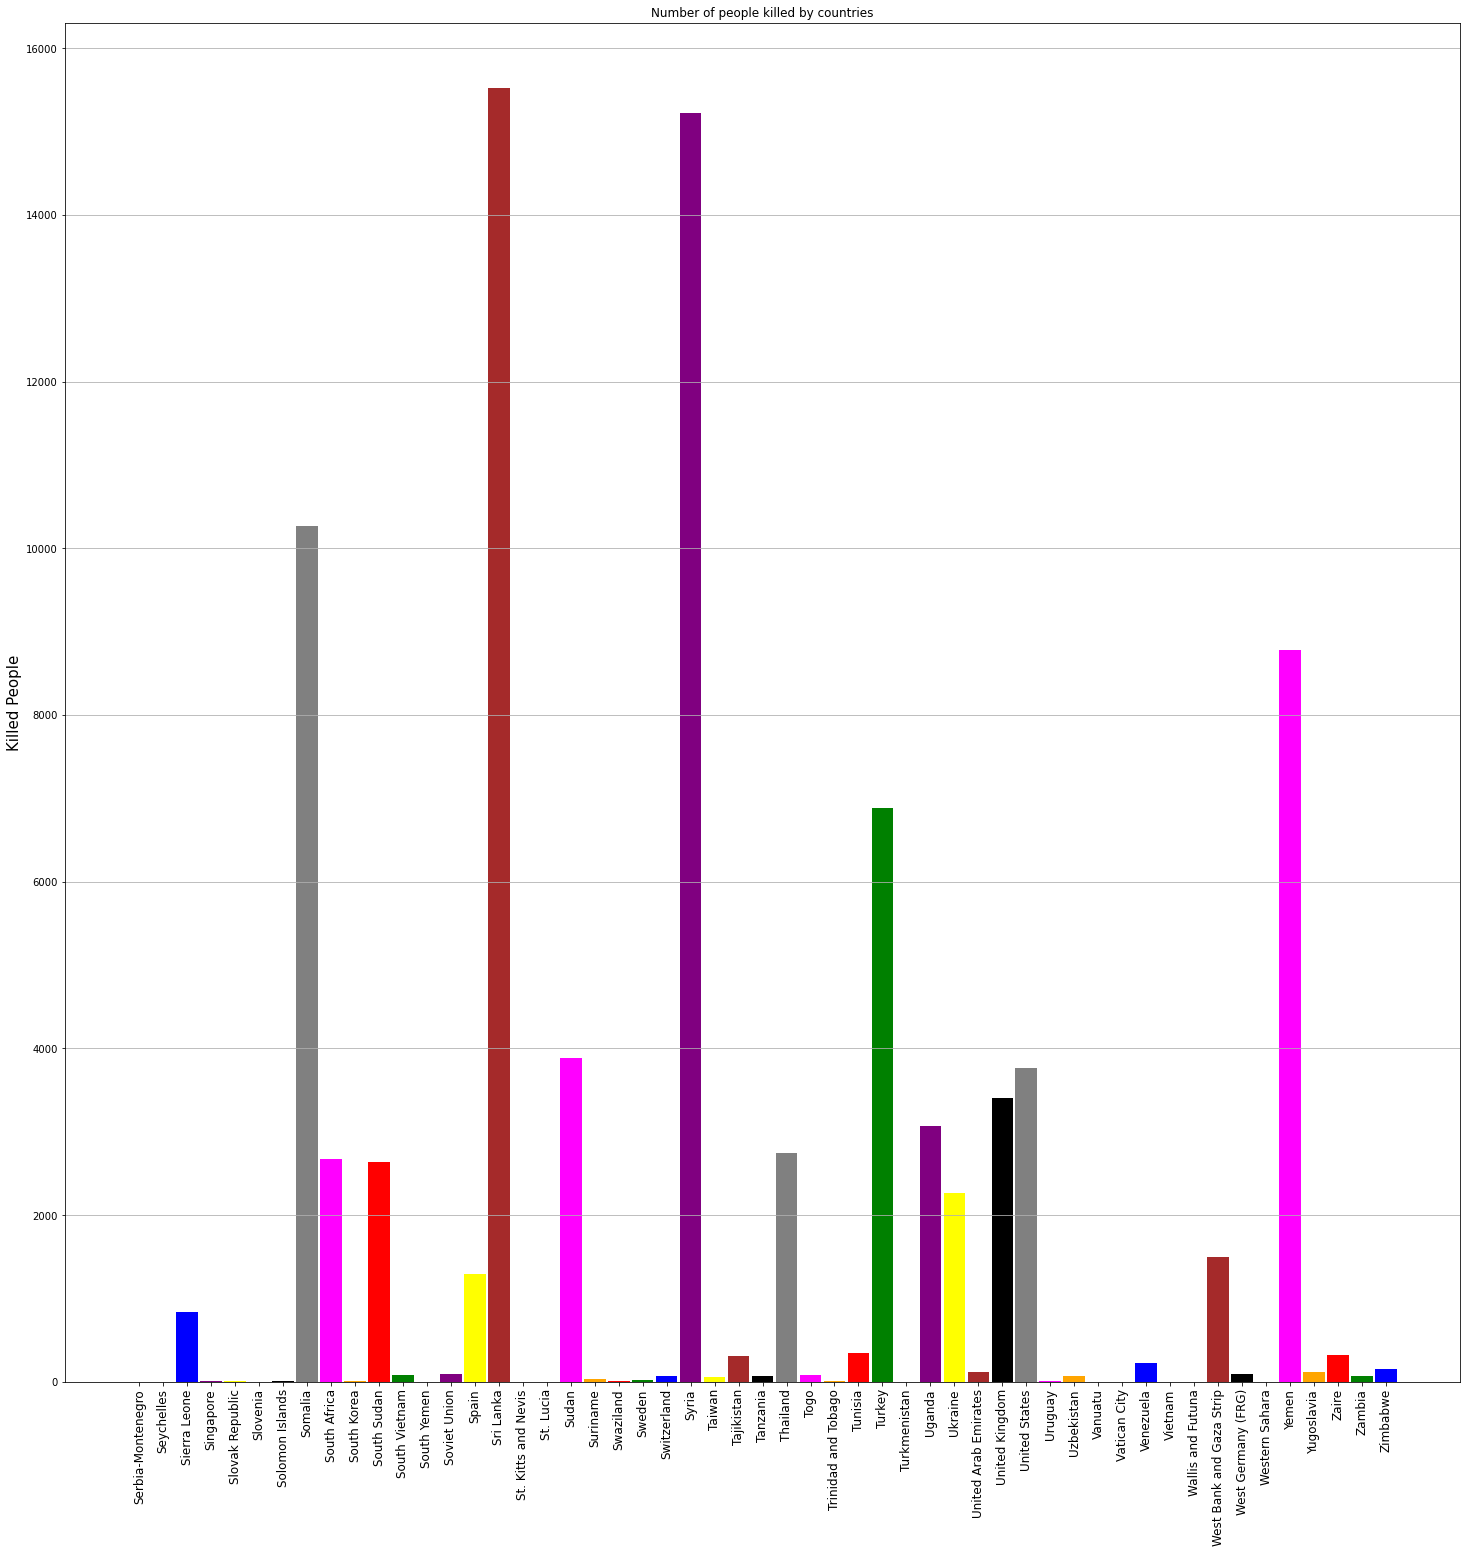

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries.